# **Import Necessary Libraries & Load the Dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('D:/Gits/Assignment-5/dataset/cyber_attacks(in).csv')

# Display first few rows and basic info
display(df.head())
display(df.info())


,protocol_type,duration,src_bytes,dst_bytes,num_packets,num_connections,attack_type
0,1,43.418651,1701.411601,201.794741,42,15,Botnet
1,1,8.587924,409.971403,710.745376,17,6,Normal
2,1,4.386891,418.478693,559.457816,17,5,Normal
3,0,NaN,NaN,NaN,11,3,Normal
4,0,1.061892,494.253699,572.459614,11,3,Normal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   protocol_type    10000 non-null  int64  
 1   duration         9500 non-null   float64
 2   src_bytes        9500 non-null   float64
 3   dst_bytes        9500 non-null   float64
 4   num_packets      10000 non-null  int64  
 5   num_connections  10000 non-null  int64  
 6   attack_type      10000 non-null  object 
dtypes: float64(3), int64(3), object(1)
memory usage: 547.0+ KB


None

### Check for Missing Values

In [ ]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
protocol_type        0
duration           500
src_bytes          500
dst_bytes          500
num_packets          0
num_connections      0
attack_type          0
dtype: int64


### Visualize Class Distribution

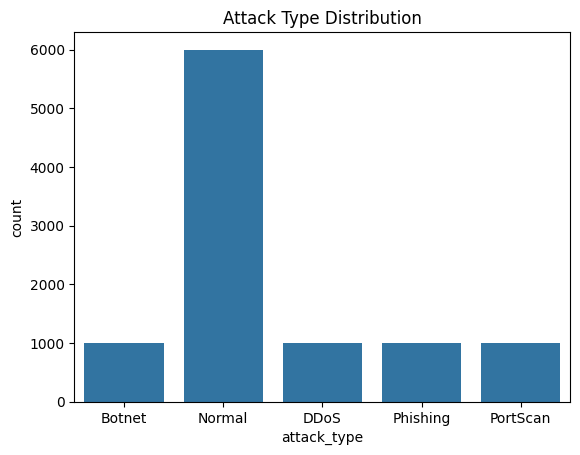

In [ ]:
# Visualize class distribution
sns.countplot(x='attack_type', data=df)
plt.title('Attack Type Distribution')
plt.show()

# **Data Preprocessing**

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

# Fill missing values using median for numerical data
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
df['protocol_type'] = label_encoder.fit_transform(df['protocol_type'])
df['attack_type'] = label_encoder.fit_transform(df['attack_type'])

# Create a class name mapping
class_mapping = dict(zip(label_encoder.transform(label_encoder.classes_), label_encoder.classes_))

# Separate features and target
X = df.drop(columns='attack_type')
y = df['attack_type']

# **Split & Train the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

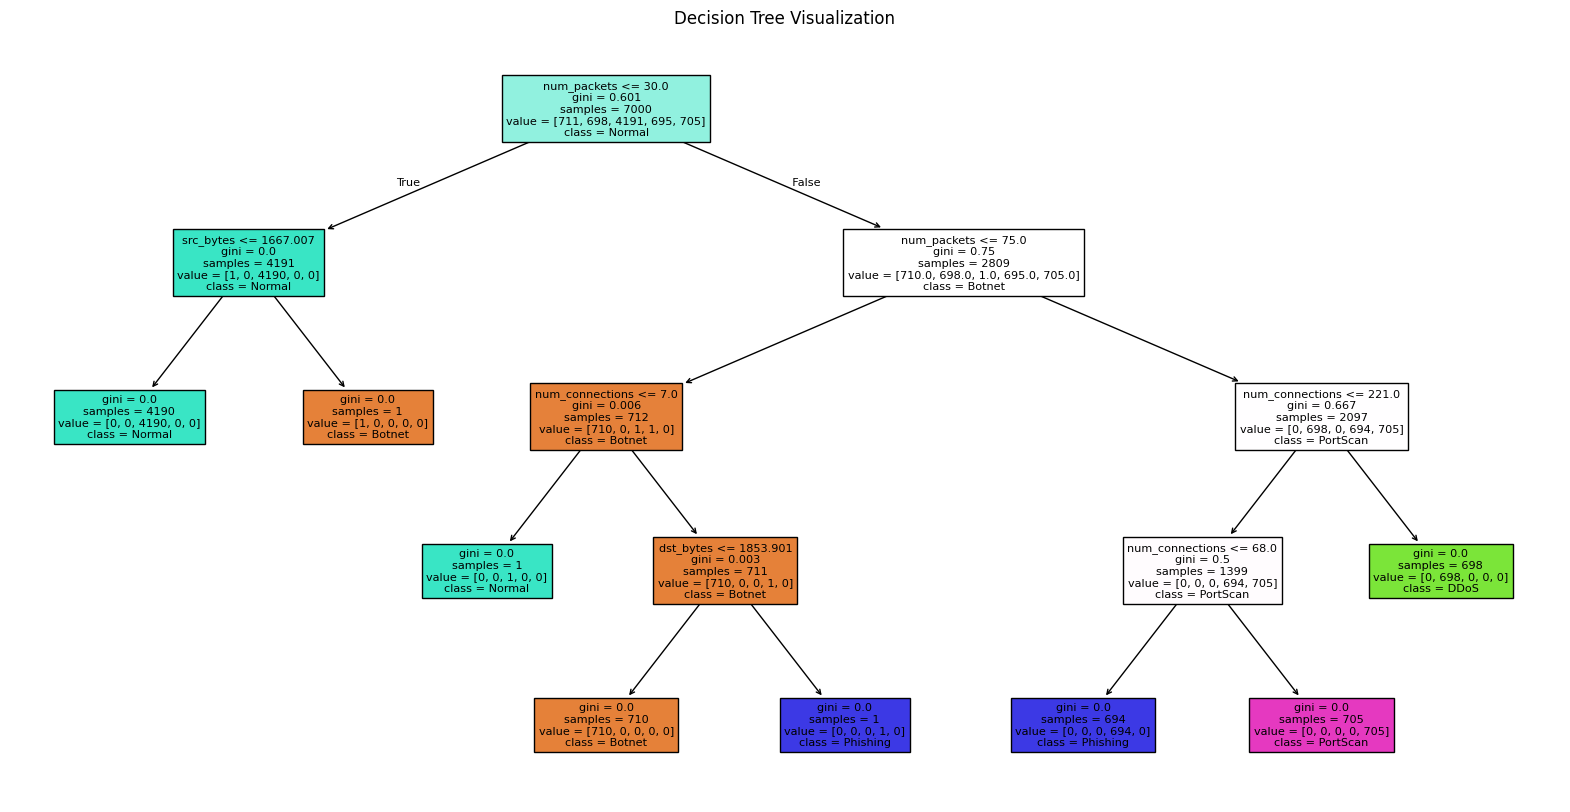

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_clf = DecisionTreeClassifier(random_state=22)
dt_clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dt_clf, feature_names=X.columns, class_names=[class_mapping[i] for i in range(len(class_mapping))], filled=True)
plt.title('Decision Tree Visualization')
plt.show()

# **Hyperparameter Tuning using GridSearchCV & Train the Best Model with Optimal Parameters**

Fitting 5 folds for each of 27 candidates, totalling 135 fits

 Grid Search Results 
Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy Score: 1.0000

 Test Results 
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


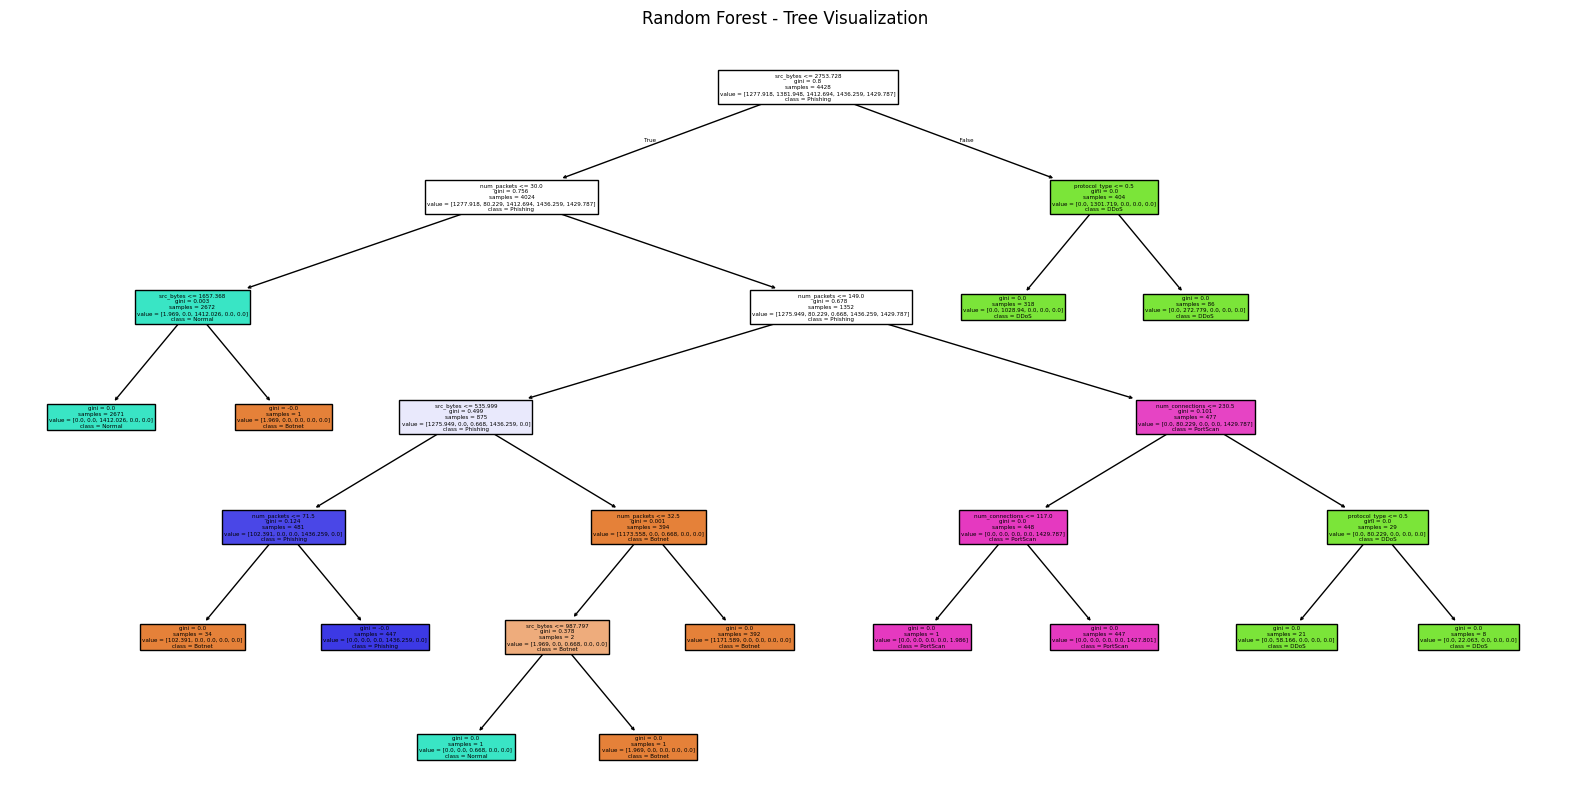

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameters for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Define multiple scoring metrics
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro'
}

# Run grid search with multiple scoring metrics
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=22, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring=scoring,
    refit='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train, y_train)

# Best parameters and results
print("\n Grid Search Results ")
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy Score: {grid_search.best_score_:.4f}")

# Train the best model with optimal parameters
rf_clf = grid_search.best_estimator_
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

# Evaluate model
print("\n Test Results ")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro'):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='macro'):.4f}")

# Visualize one of the trees from the Random Forest
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(rf_clf.estimators_[0], feature_names=X.columns, class_names=[class_mapping[i] for i in range(len(class_mapping))], filled=True)
plt.title('Random Forest - Tree Visualization')
plt.show()

# **Feature Importance**

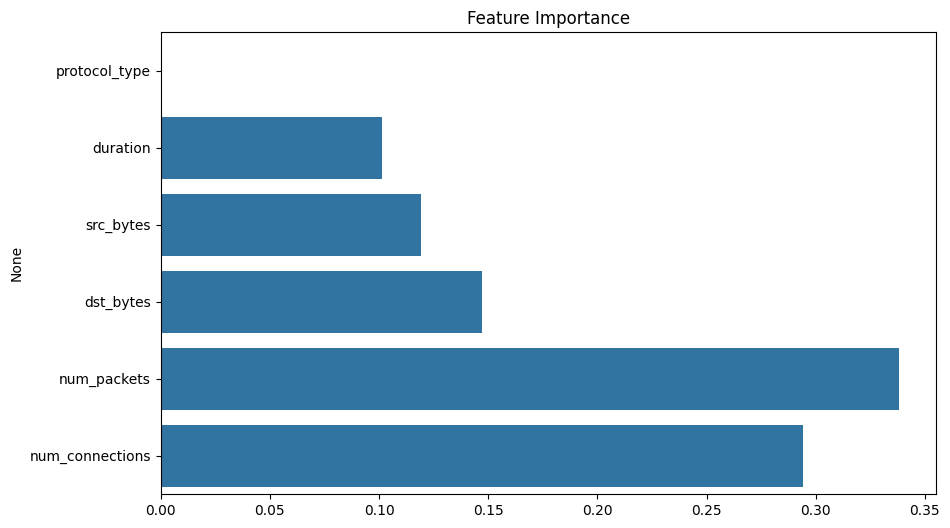

In [ ]:
importances = rf_clf.feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=X.columns)
plt.title('Feature Importance')
plt.show()